In [21]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [32]:
#import dataset

training_df = pd.read_csv(filepath_or_buffer = "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
training_df["median_house_value"] /= 1000.0

training_df.head()
# print(training_df)

# training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [23]:
def build_model(my_learning_rate):
  #declare model
  model = tf.keras.models.Sequential()

  #define its topography, no of layers, no of nodes
  model.add(tf.keras.layers.Dense(units=1, input_shape = (1, )))
  
  #compile the model
  model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = my_learning_rate), 
                loss = "mean_squared_error",
                metrics = [tf.keras.metrics.RootMeanSquaredError()])
  
  return model

def train_model(model, df, feature, label, epochs, batch_size):
  history = model.fit(x = df[feature], y = df[label], epochs = epochs, batch_size= batch_size)

  trained_weights = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch

  hist = pd.DataFrame(history.history)

  rmse = hist["root_mean_squared_error"]

  return trained_weights, trained_bias, epochs, rmse



In [20]:
def plot_the_model(trained_weights, trained_bias, feature, label):
  plt.xlabel(feature)
  plt.ylabel(label)

  random_examples = training_df.sample(n = 200)
  plt.scatter(random_examples[feature], random_examples[label])

  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weights * x1)

  plt.plot([x0, x1], [y0, y1], c = "r")

  plt.show()

def plot_the_loss_curve(epochs, rmse):
  plt.figure()
  plt.xlabel("epochs")
  plt.ylabel("RMSE")

  plt.plot(epochs, rmse, label = "loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  



Epoch 1/50


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


567/567 [==============================] - 2s 2ms/step - loss: 39318.6250 - root_mean_squared_error: 198.2892
Epoch 2/50
567/567 [==============================] - 1s 2ms/step - loss: 19262.9844 - root_mean_squared_error: 138.7912
Epoch 3/50
567/567 [==============================] - 1s 2ms/step - loss: 15167.2900 - root_mean_squared_error: 123.1556
Epoch 4/50
567/567 [==============================] - 1s 2ms/step - loss: 14851.8594 - root_mean_squared_error: 121.8682
Epoch 5/50
567/567 [==============================] - 1s 2ms/step - loss: 14630.4287 - root_mean_squared_error: 120.9563
Epoch 6/50
567/567 [==============================] - 1s 2ms/step - loss: 14495.2568 - root_mean_squared_error: 120.3962
Epoch 7/50
567/567 [==============================] - 1s 1ms/step - loss: 14351.1406 - root_mean_squared_error: 119.7962
Epoch 8/50
567/567 [==============================] - 1s 2ms/step - loss: 14199.1162 - root_mean_squared_error: 119.1600
Epoch 9/50
567/567 [=======================

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


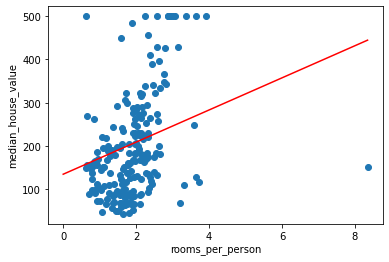

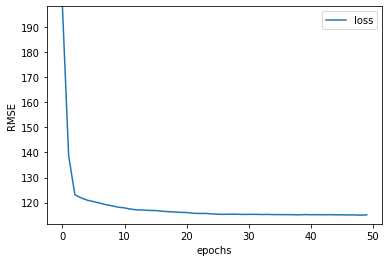

In [29]:
learning_rate = 0.06
epochs = 24
batch_size = 30

training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]

my_feature = "rooms_per_person"
my_label = "median_house_value"

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, my_feature, my_label, epoch, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [30]:
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0
